In [1]:
import functools
from typing import Callable, Tuple

import altair as alt
import numpy as np
import sympy as sp
import pandas as pd
from IPython import display

import matplotlib.pyplot as plt

In [2]:
from sympy.matrices.dense import MutableDenseMatrix

Plotting eigenvectors for a positive definite, positive semidefinite, non-definite, negative semidefinite, negative definite 2x2 matrix, respectively.

In [3]:
def plot_vector(ax: plt.Axes, vec: np.ndarray, **kwargs) -> None:
    """Plots one vector."""
    ax.arrow(0, 0, vec[0], vec[1], head_width=0.2, head_length=0.05, **kwargs)

In [17]:
def plot_eigenvectors(
    ax: plt.Axes, λ1: float, λ2: float, x1: np.ndarray, x2: np.ndarray
) -> None:
    plot_vector(ax, x1, ls="--", color="black", label=f"{λ1=:.2f}")
    plot_vector(ax, x2, ls="--", color="grey", label=f"{λ2=:.2f}")

In [18]:
def plot_contours(
    ax: plt.Axes,
    energy_func: Callable[[np.ndarray, np.ndarray], np.ndarray],
    delta: float = 0.02,
) -> None:
    """Plots contours of output of x^T @ A @ x.

    Args:
        delta: step size in the x y grids.
    """
    delta = 0.02
    x = np.arange(-10.0, 10.0, delta)
    y = np.arange(-10.0, 10.0, delta)
    X, Y = np.meshgrid(x, y)
    Z = energy_func(X, Y)
    ax.contour(X, Y, Z, levels=50, cmap='coolwarm')

In [19]:
def energy_tmpl(x, y, a, b, c):
    """Calcualtes x^T @ A @ x"""
    return a * x ** 2 + 2 * b * x * y + c * y ** 2

In [20]:
def calc_eigenvectors(A: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    (λ1, λ2), S = np.linalg.eig(A) # eigenvalues are not used for now.
    x1 = S[:,0] * 5
    x2 = S[:,1] * 5
    return λ1, λ2, x1, x2

In [21]:
def plot_contours_and_eigenvectors(ax: plt.Axes, A: np.ndarray) -> None:
    """Calculates and plots eigenvectors of A."""
    energy_func = functools.partial(energy_tmpl, a=A[0][0], b=A[0][1], c=A[1][1])
    
    λ1, λ2, x1, x2 = calc_eigenvectors(A)
    
    plot_contours(ax, energy_func)
    plot_eigenvectors(ax, λ1, λ2, x1, x2)
    ax.text(0.1, 0.1, f'A=\n{A}', transform=ax.transAxes)

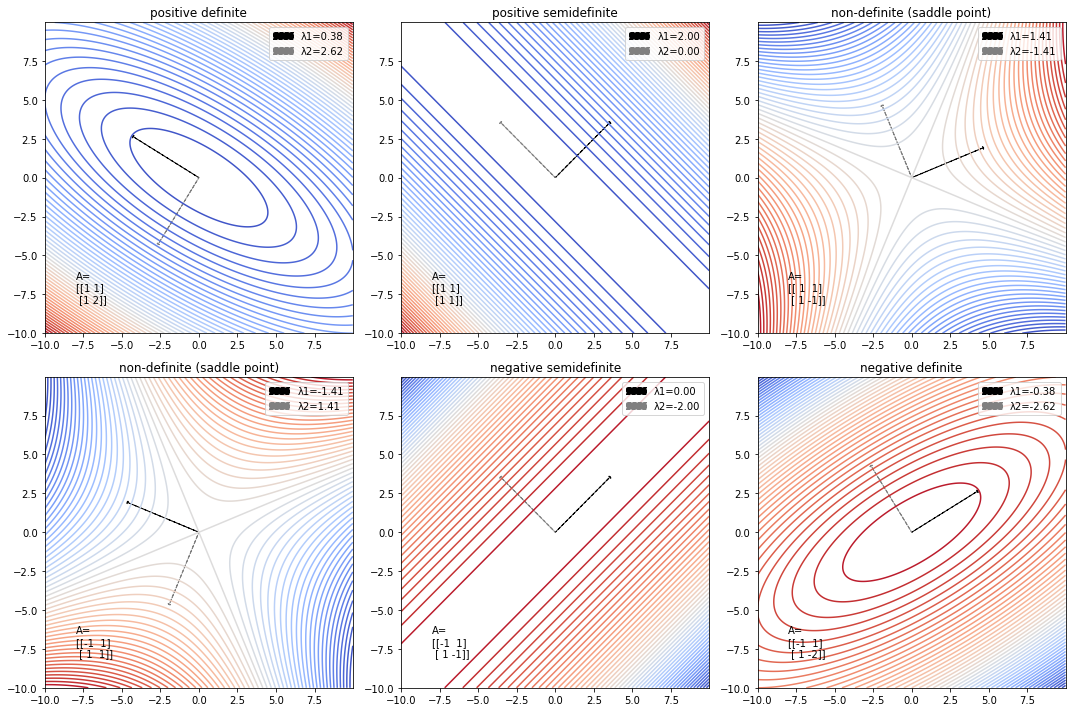

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for index, data in enumerate(
    [
        {
            "title": "positive definite",
            "A": np.array(
                [
                    [1, 1],
                    [1, 2],
                ]
            ),
        },
        {
            "title": "positive semidefinite",
            "A": np.array(
                [
                    [1, 1],
                    [1, 1],
                ]
            ),
        },
        {
            "title": "indefinite (saddle point)",
            "A": np.array(
                [
                    [1, 1],
                    [1, -1],
                ]
            ),
        },
        {
            "title": "indefinite (saddle point)",
            "A": np.array(
                [
                    [-1, 1],
                    [1, 1],
                ]
            ),
        },
        {
            "title": "negative semidefinite",
            "A": np.array(
                [
                    [-1, 1],
                    [1, -1],
                ]
            ),
        },
        {
            "title": "negative definite",
            "A": np.array(
                [
                    [-1, 1],
                    [1, -2],
                ]
            ),
        },
    ]
):
    ax = axes[index]
    plot_contours_and_eigenvectors(ax, data["A"])
    ax.legend()
    ax.set(title=data["title"])
plt.tight_layout()

Note, red color means higher value, blue color means lower value.